# 사전 준비


### 한글 글꼴 다운

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 드라이브 연동

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_1/'            # 자기 경로를 쓰기

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_1/'

### 필요 라이브러리

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
import json

# 데이터 전처리


In [ ]:
# csv 파일 열기
df = pd.read_csv(drive_path + "지역별_신·재생에너지_발전량_2020년.csv", encoding="euc-kr")
df.head(3)

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),2020,2020.1,2020.2,2020.3,2020.4,2020.5,...,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484


In [ ]:
'''
열(column, 세로에 써있는 정보들)을 꺼낼 때는 df.['열 이름']
행(index, 가로에 써있는 정보들)을 꺼낼 때는 df.loc['행 이름']
    혹은, df.iloc[행 숫자]
.tolist() : . 앞에 있는 값을 리스트로 저장 
df.column : 데이터 프레임의 column 이름들을 가져옴
'''
# column명을 첫 번째 행으로 바꾸기
column_names = df.iloc[0].values.tolist() 
# df.iloc[0].values.tolist() = ['에너지원별(1)','에너지원별(2)','에너지원별(3)','에너지원별(4)','전국','서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북','경남', '제주']
df.columns = column_names   # df의 columns들을 column_names로 바꾼다.
df.head(3)

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484


In [ ]:
# 소계를 남기고 사업용과 자가용 지우기
df1 = df[ df['에너지원별(3)'].str.contains('소계')]
# df['에너지원별(3)'].str.contains('소계') : df['에너지원별(3)'] 열에서 '소계' 라는 문자가 포함된 것을 true, 아니면 false로 출력한다.
# 데이터 프레임에 True, False로 이루어진 판다시 시리즈를 대입하면, True만 출력한다.
# 따라서 df1은 에너지원별(3)에 소계가 포함된 데이터 프레임만 저장된다.
df1

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484
3,신·재생에너지 총발전량①+② (MWh),자가용,소계,소계,3270157,207652,94380,92700,91328,64683,...,28805,498664,177414,244927,241035,226544,281436,249294,334804,81012
4,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,소계,소계,37161788,304645,281073,217755,517763,309035,...,116209,2912279,4804041,2149373,4495612,6831024,4767309,3660764,2292423,2479305
7,신·재생에너지 총발전량①+② (MWh),② 신에너지 합,소계,소계,5899723,341376,184406,7978,953567,3284,...,39734,1232435,49234,624,2835565,8625,168040,32155,19637,191
10,신·재생에너지 지역별 발전비중 (%),소계,소계,소계,100.00,1.50,1.08,0.52,3.42,0.73,...,0.36,9.63,11.27,4.99,17.02,15.88,11.46,8.58,5.37,5.76
11,① 재생에너지,태양광 (MWh),소계,소계,19297854,227866,227442,169862,188044,290921,...,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
14,① 재생에너지,풍력 (MWh),소계,소계,3149798,201,253,26,52828,2,...,-,5625,782254,16,2986,131205,576229,944024,74178,578059
17,① 재생에너지,수력 (MWh),소계,소계,3879383,1112,93,12951,39579,7795,...,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
20,① 재생에너지,해양 (MWh),소계,소계,457263,-,-,-,-,-,...,-,457257,-,-,-,-,-,-,-,5.6


In [ ]:
# 불필요한 column 삭제 및 정리

# axis는 축을 의미하고, axis가 0이면 가로쪽이고 axis가 1이면 세로쪽이다.
# drop은 리스트로 주어지는 행(axis=0) 또는 열(axis=1)을 삭제한다.
# .iloc[6:]은 6번 행부터 나머지 모두 불러온다는 의미
df2 = df1.drop(['에너지원별(1)','에너지원별(3)', '에너지원별(4)'], axis=1).iloc[6:]  
df2

,에너지원별(2),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광 (MWh),19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
14,풍력 (MWh),3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
17,수력 (MWh),3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
20,해양 (MWh),457263,-,-,-,-,-,-,-,-,457257,-,-,-,-,-,-,-,5.6
22,바이오 (MWh),9938354,29554,9827,29663,228842,4779,-,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
49,폐기물 (MWh),439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
68,연료전지 (MWh),3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
71,IGCC (MWh),2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# column의 이름 변경

# column의 이름을 변경할 때에는 dict 형태로 대입
df3 = df2.rename(columns={'에너지원별(2)' : '에너지원별'}) # '에너지원별(2)'을 '에너지원별'로 바꾼다는 의미
df3

,에너지원별,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광 (MWh),19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
14,풍력 (MWh),3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
17,수력 (MWh),3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
20,해양 (MWh),457263,-,-,-,-,-,-,-,-,457257,-,-,-,-,-,-,-,5.6
22,바이오 (MWh),9938354,29554,9827,29663,228842,4779,-,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
49,폐기물 (MWh),439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
68,연료전지 (MWh),3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
71,IGCC (MWh),2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 에너지원별 단위 삭제 및 index 선정
new_index = []
for i in df3['에너지원별'].tolist():    # 에너지원별 열을 list로 가져옴
    new_index.append(i[:-6])            # 태양광 (MWh)에서 [:-6]은 처음부터 (끝에서부터 6번째 전) 까지 불러오므로 i[:-6]은 태양광 이고, 이걸 빈 리스트에 저장
df3['에너지원별'] = new_index           # '에너지원별'의 열을 new_index 안에 있는 값들로 바꾼다.
df3

,에너지원별,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
14,풍력,3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
17,수력,3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
20,해양,457263,-,-,-,-,-,-,-,-,457257,-,-,-,-,-,-,-,5.6
22,바이오,9938354,29554,9827,29663,228842,4779,-,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
49,폐기물,439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
68,연료전지,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
71,IGCC,2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# '에너지원별' 열을 index로 지정
df4 = df3.set_index('에너지원별')       # loc을 사용해서 행을 가져오기 쉽게 하기 위함
df4

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별,,,,,,,,,,,,,,,,,,
태양광,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
풍력,3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
수력,3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
해양,457263,-,-,-,-,-,-,-,-,457257,-,-,-,-,-,-,-,5.6
바이오,9938354,29554,9827,29663,228842,4779,-,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
폐기물,439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
연료전지,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
IGCC,2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
df4[df4 == '-']     # df4에 -인 정보를 모두 불러오기

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별,,,,,,,,,,,,,,,,,,
태양광,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
풍력,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
수력,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
해양,NaN,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-,-,-,NaN
바이오,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
폐기물,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
연료전지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGCC,NaN,-,-,-,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-


In [ ]:
# 발전양의 데이터 타입 맞춰주기
df4[df4 == '-'] = 0 # df4의 값 중 '-'만 불러오고, 이를 0으로 바꿈
energy = df4.astype('float64')  # 형태를 맞춰줘야 연산할 수 있으므로 실수 형태로 맞춤
energy

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별,,,,,,,,,,,,,,,,,,
태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 전처리된 데이터 저장
# energy.to_csv(drive_path + 'project1.csv')

# 데이터 시각화




### 에너지원별 발전량 비교

##### 광역시도별 에너지원 차지 비중

In [ ]:
# 저장한 데이터 불러오기
energy = pd.read_csv(drive_path + 'project1.csv', index_col='에너지원별') # index를 바로 지정해서 불러오기
energy

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별,,,,,,,,,,,,,,,,,,
태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 신재생 에너지별 색상을 출력하는 함수
def choice_color(x):
    # 에너지원과 색을 dict 형태로 저장
    # 색 참고 자료 : https://wikidocs.net/92085
    # 딕셔너리로 지정한 이유 : 함수에 에너지원을 받으면 대응하는 색을 출력하기 위해선 dict형이 가장 쉽다.
    color_dict = {'태양광':'orangered', 
                  '풍력':'deepskyblue', 
                  '수력':'b', 
                  '바이오':'limegreen', 
                  '연료전지':'aqua', 
                  'IGCC' : 'y', 
                  '폐기물':'k', 
                  '해양': 'b', 
                  '기타':'k'}
    bio_color = []
    # dict에 대괄호로 key를 입력하면 value가 출력된다.
    # 이를 출력해서 bio_color라는 리스트에 저장하고, 이를 리턴한다.
    for i in x:
        bio_color.append(color_dict[f'{i}'])

    return bio_color

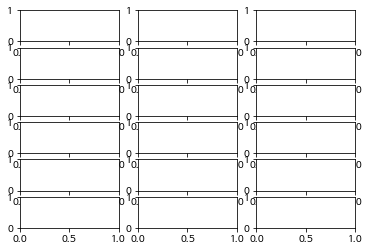

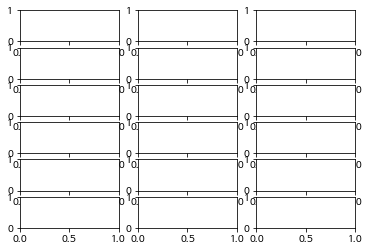

In [ ]:
f, axes = plt.subplots(6, 3)  
f

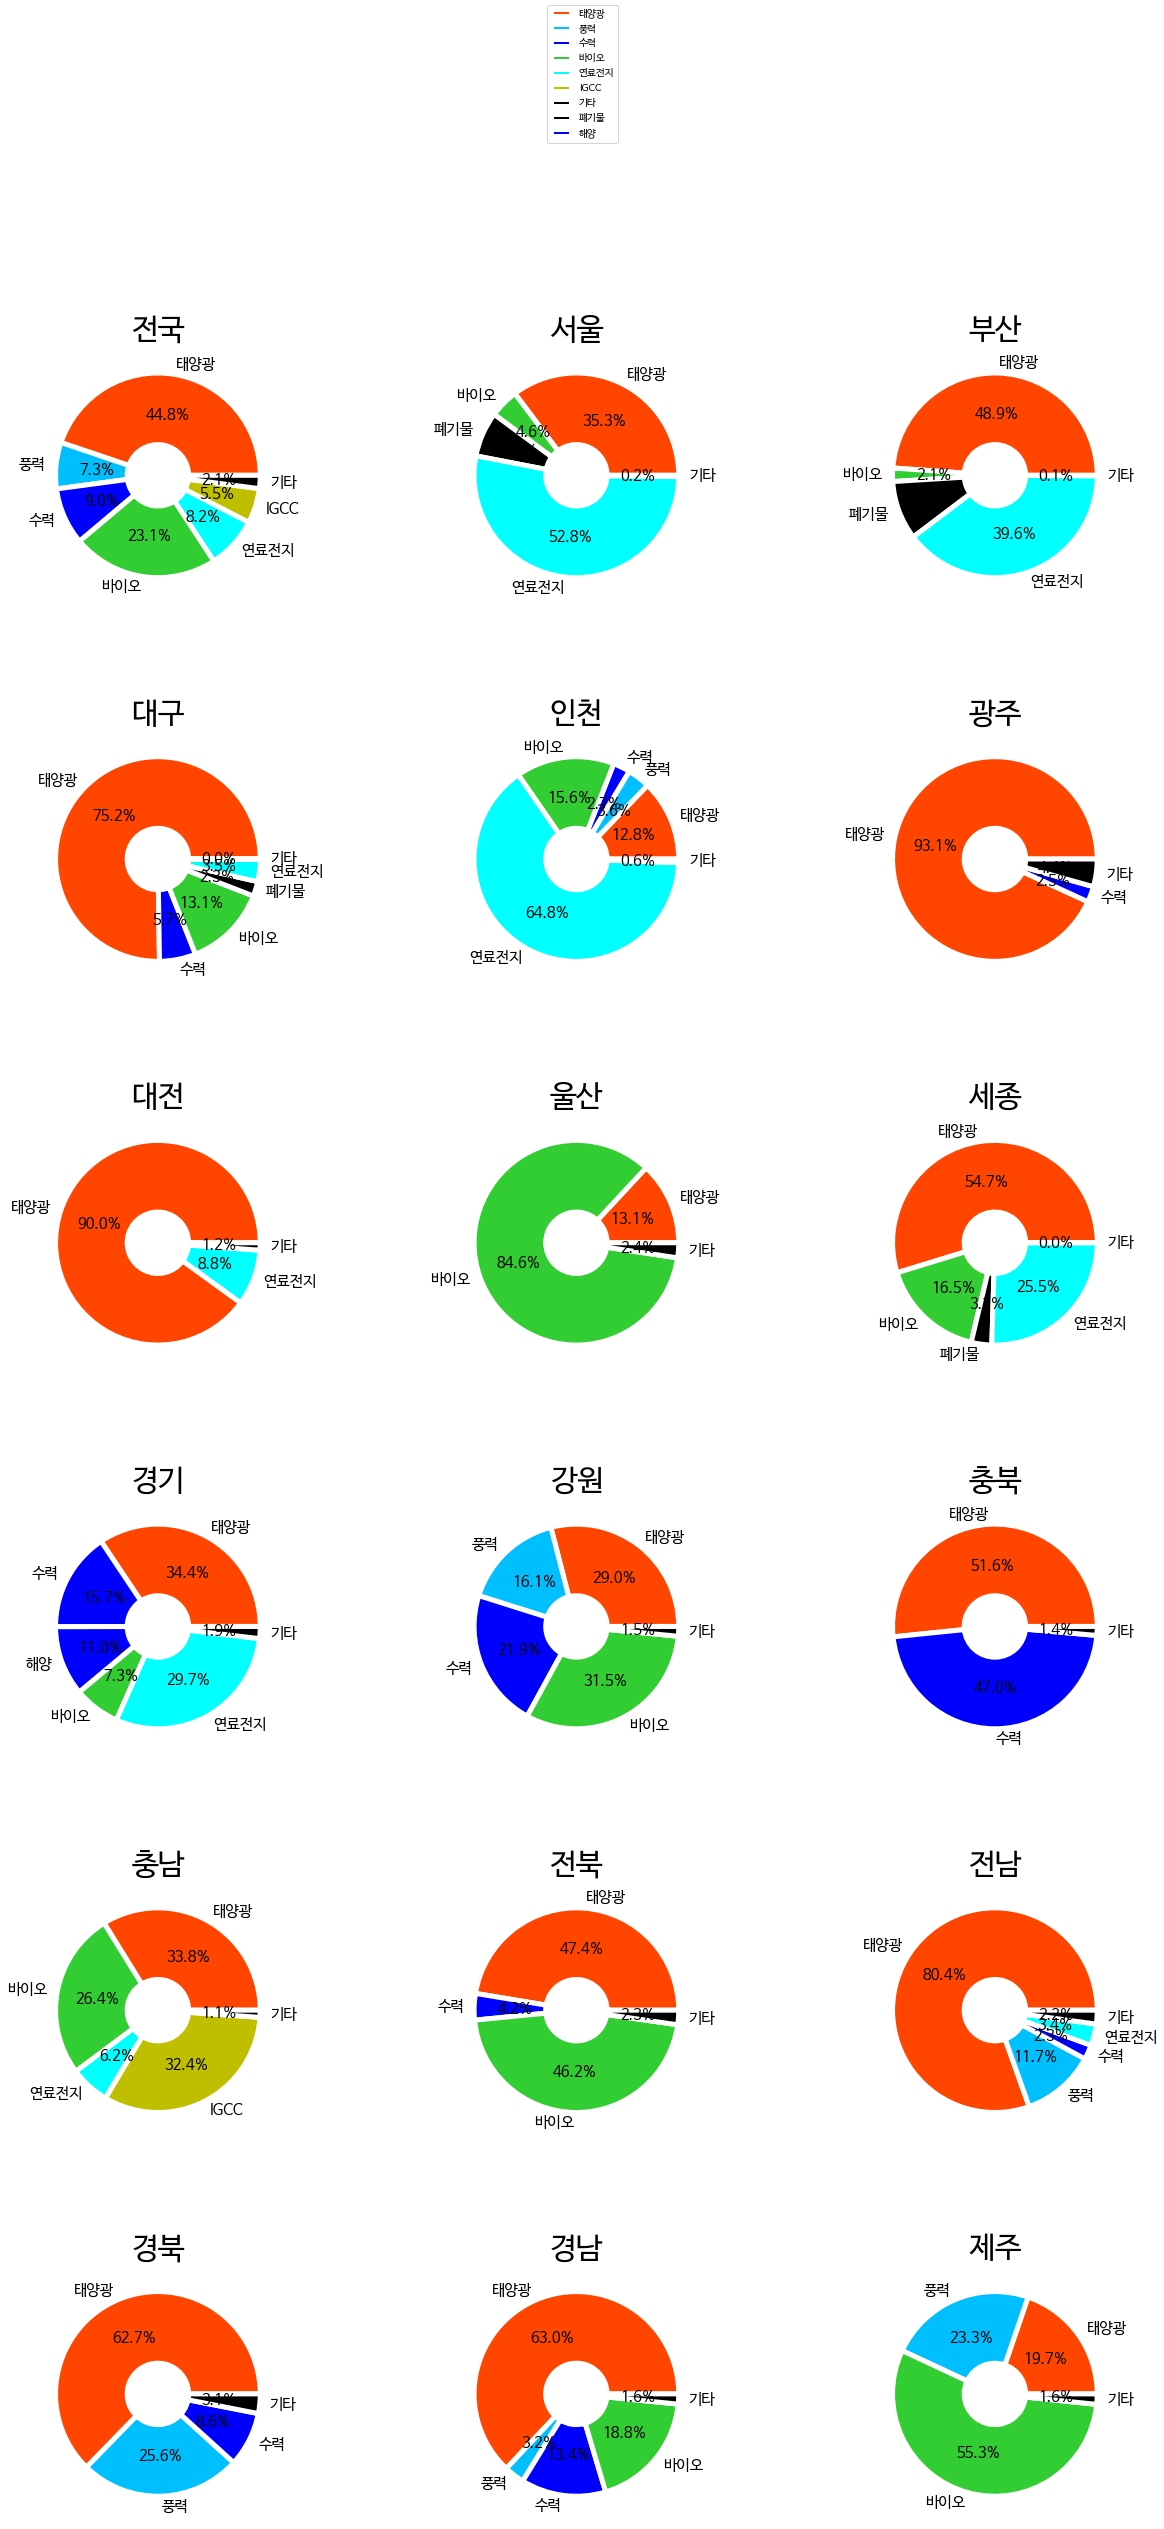

In [ ]:
# 데이터 시각화 : 도넛 그래프
f, axes = plt.subplots(6, 3)        # 6행 3열의 빈 그래프 용지 생성

f.set_size_inches((20, 40))         # 그래프 용지의 사이즈는 20x40(가로x세로)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)     # 각 그래프의 w(가로) 여백과 h(세로) 여백

idx = 0
for j in range(6):
    for k in range(3):
        # 2퍼센트 미만은 모두 더해서 기타로 처리
        city = list(energy.columns)[idx]    # ['전국', '서울', ... , '제주'][idx]
        # idx = 0이라 가정하면, city='전국'이 된다.
        # under_percent = energy['전국'][energy['전국'] / energy['전국'].sum() * 100 < 2].sum()
        # 전국 열 안에, 각 항목을 전국 전체로 나눈 값의 퍼센트가 2 미만인 것을 모두 더하라
        under_percent = energy[f'{city}'][energy[f'{city}'] / energy[f'{city}'].sum() * 100 < 2].sum()
        # 반대개념
        over_percent = energy[f'{city}'][energy[f'{city}'] / energy[f'{city}'].sum() * 100 >= 2]   

        # 기타 항목을 2퍼센트 이상 항목에 추가
        over_percent.loc['기타'] = under_percent

        # 도넛 그래프 그리기
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} # 너비, 경계 색, 라인 두께
        axes[j, k].pie(over_percent,                            # 파이차트 들어갈 값
                       labels=over_percent.index,               # 파이차트 들어갈 에너지원 제목
                       autopct='%.1f%%',                        # 소숫점 첫째까지 표시
                       wedgeprops=wedgeprops,                   # 위에 지정한 파이차트 모양 넣어주기
                       colors=choice_color(over_percent.index), # 에너지원별 만든 색 넣어주기
                       pctdistance=0.6,                         # 퍼센트 숫자가 써지는 위치(클수록 밖)
                       textprops=dict(size=15, weight=3))       # 텍스트 문자 사이즈와 두께(에너지원)
        axes[j, k].set_title(city, fontsize=30)         # 제목의 폰트 사이즈
        idx += 1

# 공통 legend를 출력
lines = []
labels = []

for ax in f.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

# energy_color의 중복을 없애기 위해 거꾸로 dict형으로 만듦
# dict 형의 특징 : key값의 중복이 없다.
# 따라서 key에 에너지원을 넣어주고 value만 계속 업데이트 시킨다.
# 예시) lines와 labels를 뽑으면, 이상한 문자들이 lines에 들어가있고, 태양열과 같은 에너지원이 labels에 들어감
#       태양열을 dict의 key로 하면, 그 뒤에 들어오는 태양열의 값들은 업데이트만 됨.
#       dict = {'a':1, 'b':2}라는 dict형이 있을 때,
#       dict['a'] = 3 이라고 하면, dict는 {'a':3, 'b':2}로 a의 value가 업데이트 됨.
#       따라서 태양열 값은 맨 마지막 값으로 업데이트. 모든 서브플롯에서 태양열은 같은 색이므로 상관이 없다.
# 참고) https://www.delftstack.com/ko/howto/matplotlib/how-to-make-a-single-legend-for-all-subplots-in-matplotlib/
energy_color = dict(zip(labels, lines))
energy_color = {val : key for key, val in energy_color.items()}

# legend 위치 설정하기
f.legend(energy_color.keys(), energy_color.values(), loc='upper center')
plt.show()

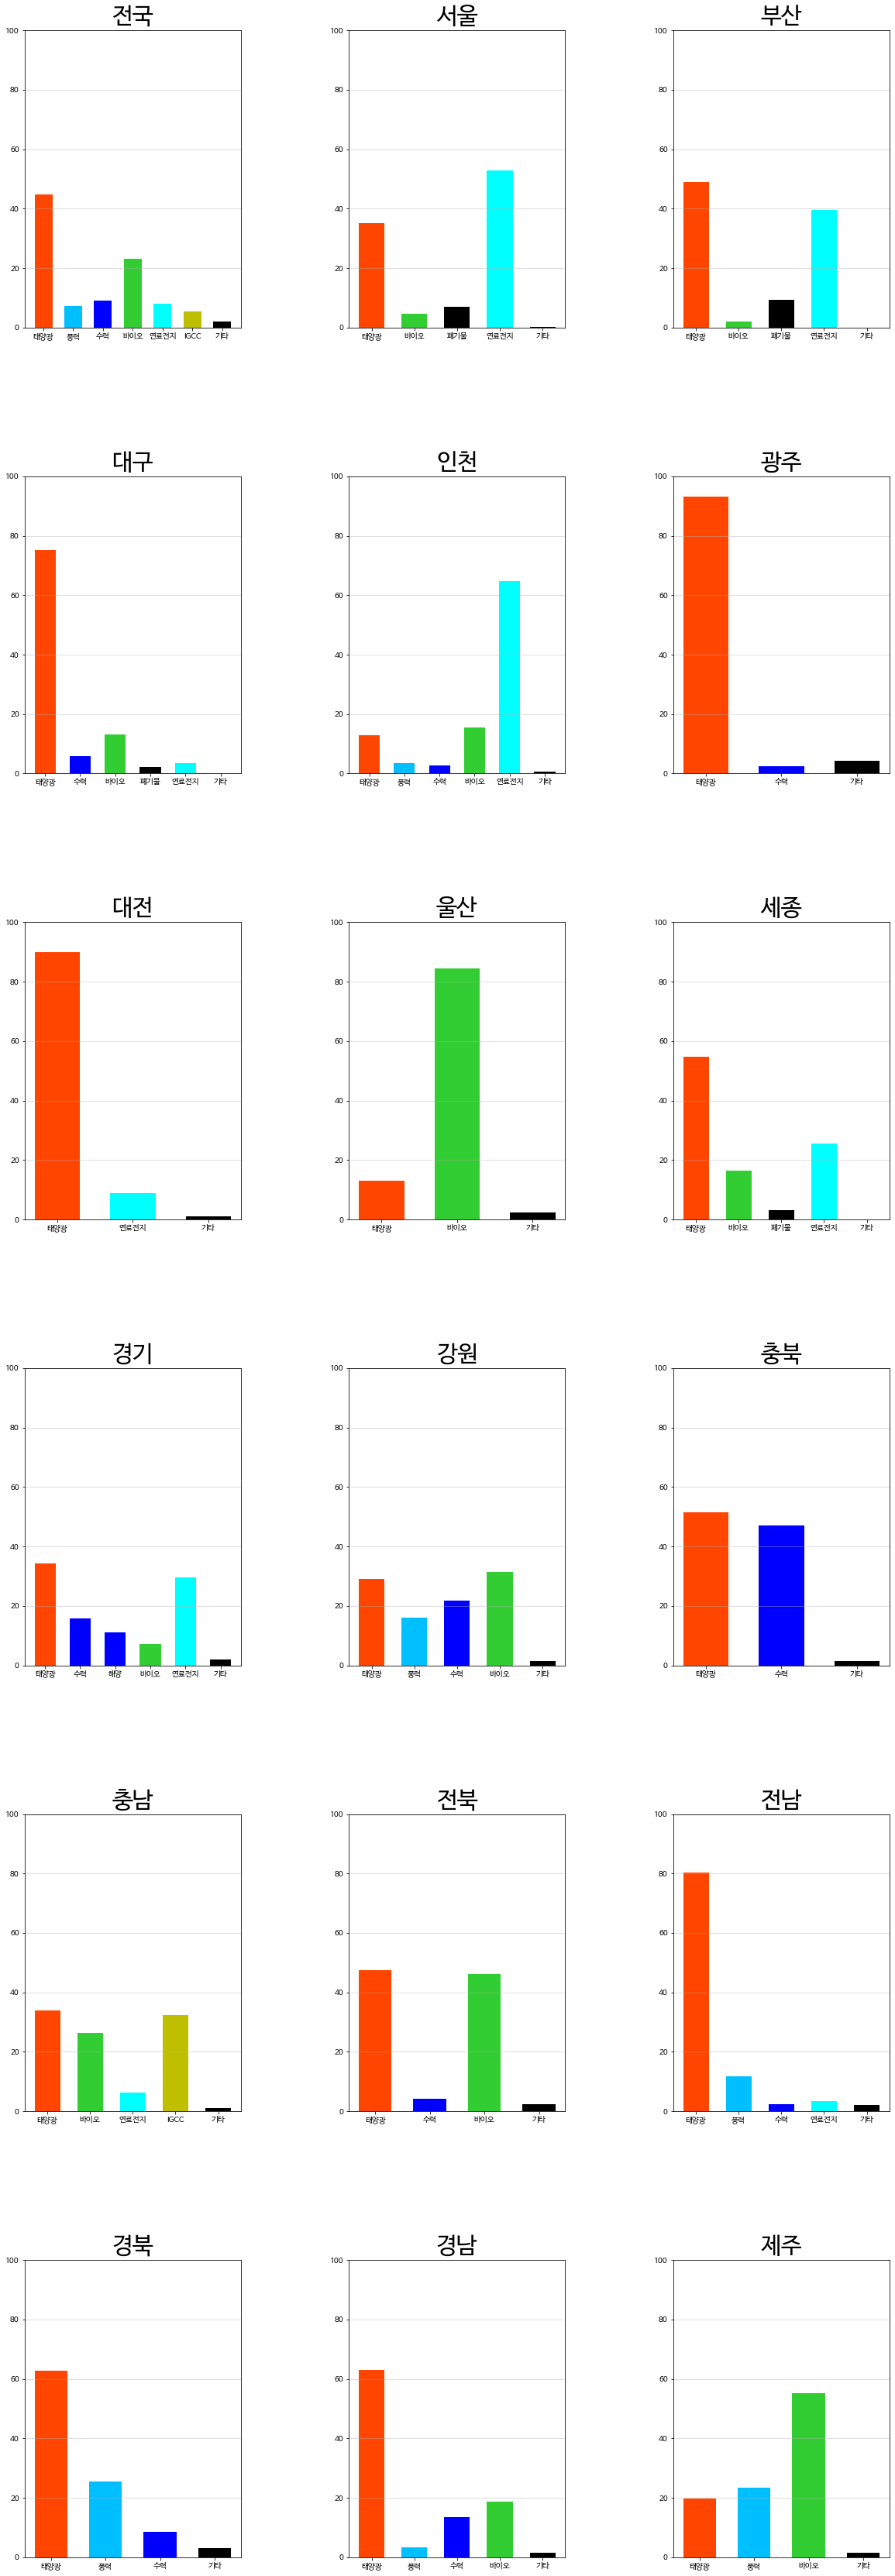

In [ ]:
# 데이터 시각화 : 막대 그래프
f, axes = plt.subplots(6, 3)

f.set_size_inches((20, 60))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
idx = 0

for j in range(6):
    for k in range(3):
        # 2퍼센트 미만은 모두 더해서 기타로 처리
        city = list(energy.columns)[idx]
        under_percent = energy[f'{city}'][energy[f'{city}'] / energy[f'{city}'].sum() * 100 < 2].sum()
        over_percent = energy[f'{city}'][energy[f'{city}'] / energy[f'{city}'].sum() * 100 >= 2] 
        over_percent.loc['기타'] = under_percent

        # y축 범위 설정
        axes[j, k].set_ylim(0, 100)

        # 막대그래프 그리기
        axes[j, k].bar(over_percent.index,                              # 막대그래프 x축에 들어갈 값
                       over_percent / over_percent.sum() * 100,         # y축 값(퍼센트)
                       color=choice_color(list(over_percent.index)),    # 막대그래프 색깔
                       width=0.6)                                       # 막대 너비
        axes[j, k].set_title(city, fontsize=30)         # 제목 + 제목 크기
        axes[j, k].grid(axis='y', alpha=0.5)            # 그래프에 0.5정도 밝기인 y축 값을 알게 해주는 선 그리기
        idx += 1

plt.show()

##### 단일 에너지원별 광역시도 발전량 비교

In [ ]:
# 광역시도별 상징 색을 출력하는 함수
def city_color(x):
    color_dict = {'서울':'firebrick', 
                  '부산':'darkorange', 
                  '대구':'magenta', 
                  '인천':'indigo', 
                  '광주':'royalblue', 
                  '대전': 'lime', 
                  '울산':'darkcyan', 
                  '세종': 'aqua', 
                  '경기':'navy',
                  '강원':'yellowgreen', 
                  '충북': 'limegreen', 
                  '충남':'darkorchid',
                  '전북':'dodgerblue', 
                  '전남': 'gold', 
                  '경북':'royalblue',
                  '경남':'tomato', 
                  '제주': 'b'}
    bio_color = []
    for i in x:
        bio_color.append(color_dict[f'{i}'])

    return bio_color


In [ ]:
# 전체 에너지 비교를 위한 합산
energy_temp = energy.copy()                             # 데이터를 훼손하지 않기 위해 copy 한다.
energy_temp.loc['총 발전량'] = energy_temp.sum(axis=0)  # 총 발전량 이라는 행을 만들고, 이는 각 열을 더한 것.
energy_temp

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별,,,,,,,,,,,,,,,,,,
태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0
총 발전량,43061513.0,646021.0,465479.0,225732.0,1471330.0,312320.0,100649.0,945399.0,155943.0,4144715.0,4853276.0,2149997.0,7331177.0,6839650.0,4935349.0,3692918.0,2312060.0,2479496.6


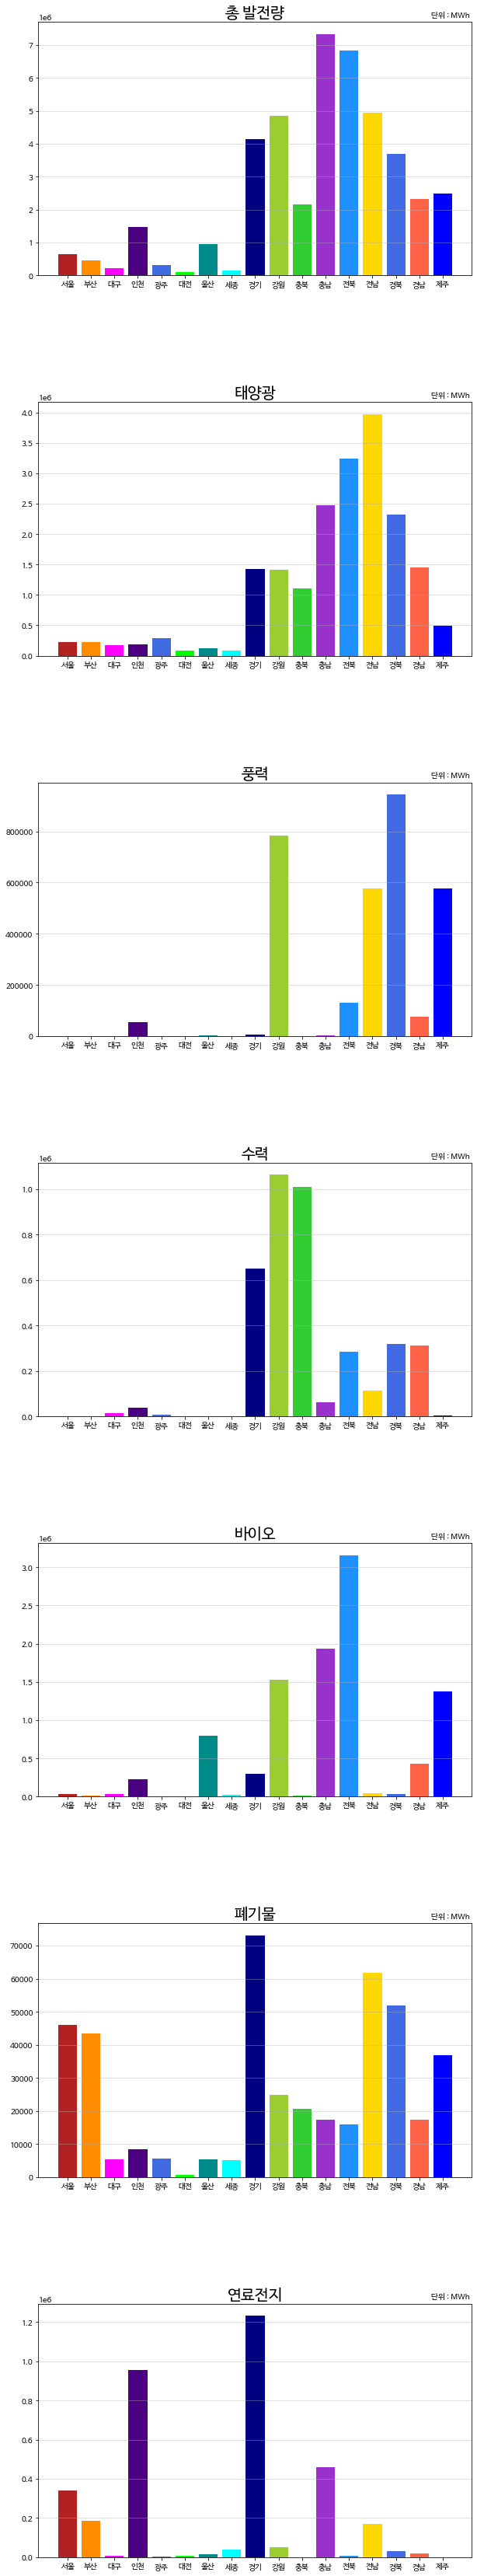

In [ ]:
# 데이터 시각화 : 막대 그래프
energy_kind = ['총 발전량', '태양광', '풍력', '수력', '바이오', '폐기물', '연료전지']        # 해양, igcc는 차이가 크다
f, axes = plt.subplots(len(energy_kind), 1)

f.set_size_inches((10, 60))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

for idx, kind in enumerate(energy_kind):
    # x축은 광역시도
    kind_series = energy_temp.loc[kind][1:]

    # 막대그래프 그리기
    axes[idx].bar(kind_series.index, 
                  kind_series, 
                  color=city_color(kind_series.index.to_list()))        
    axes[idx].set_title(kind, fontsize=20)
    axes[idx].grid(axis='y', alpha=0.5)
    # '단위 : MWh'라는 글자를 x축으로 15.5번쨰 만큼(제주가 15번째), y축으로 그래프의 최대값보다 1.07 큰 위치에 써라.
    axes[idx].text(15.5, max(kind_series)*1.07, '단위 : MWh') 

plt.show()

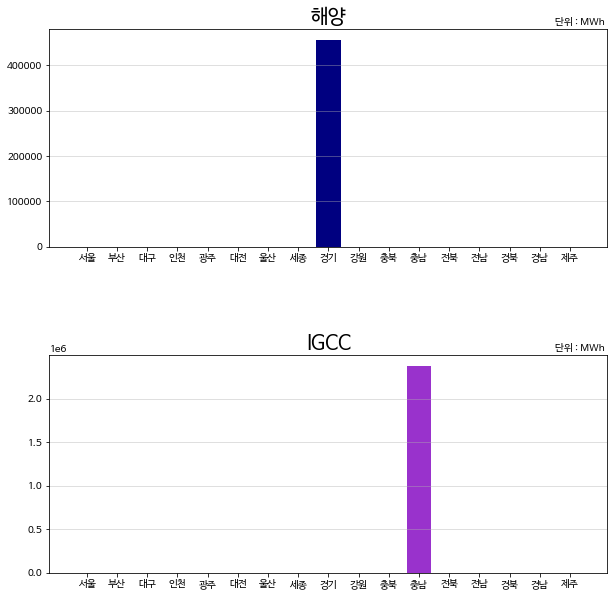

In [ ]:
# 데이터 시각화 : 해양과 IGCC
energy_kind = ['해양', 'IGCC']      
f, axes = plt.subplots(len(energy_kind), 1)

f.set_size_inches((10, 10))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

for idx, kind in enumerate(energy_kind):
    # x축은 광역시도
    kind_series = energy_temp.loc[kind][1:]

    # 막대그래프 그리기
    axes[idx].bar(kind_series.index, 
                  kind_series, 
                  color=city_color(kind_series.index.to_list()))        
    axes[idx].set_title(kind, fontsize=20)
    axes[idx].grid(axis='y', alpha=0.5)
    axes[idx].text(15.5, max(kind_series)*1.07, '단위 : MWh')

plt.show()

##### 단일 에너지원별 광역시도 발전량 비교(퍼센트)

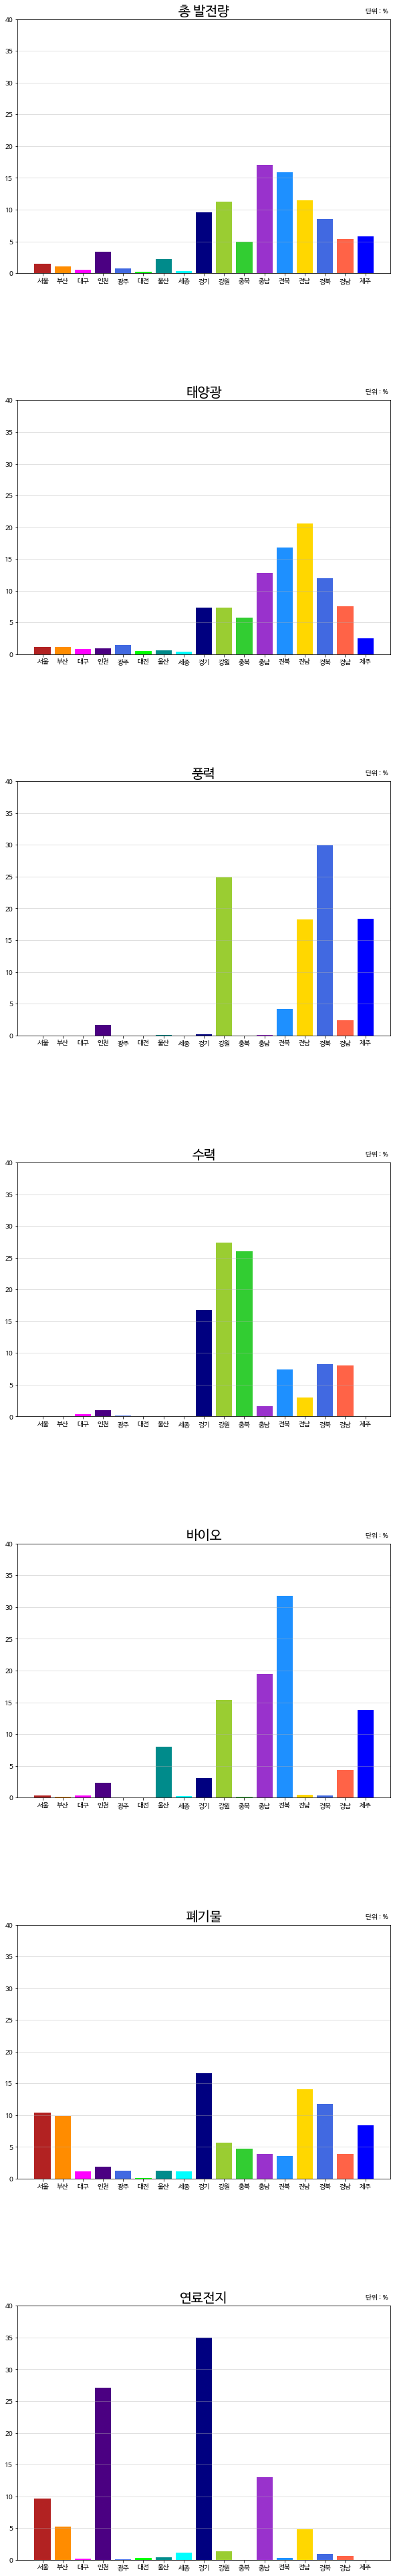

In [ ]:
# 데이터 시각화 : 막대 그래프(퍼센트)
energy_kind = ['총 발전량', '태양광', '풍력', '수력', '바이오', '폐기물', '연료전지']        # 해양, igcc는 차이가 크다
f, axes = plt.subplots(len(energy_kind), 1)

f.set_size_inches((10, 70))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

for idx, kind in enumerate(energy_kind):
    # x축은 광역시도
    kind_series = energy_temp.loc[kind][1:]

    # y축 범위 지정
    axes[idx].set_ylim(0, 40)

    # 막대그래프 그리기(퍼센트)
    axes[idx].bar(kind_series.index, 
                  kind_series / kind_series.sum() * 100, 
                  color=city_color(kind_series.index.to_list()))        
    axes[idx].set_title(kind, fontsize=20)
    axes[idx].grid(axis='y', alpha=0.5)
    axes[idx].text(16, 41, '단위 : %')          # 그래프 최대값이 40퍼센트고, 따라서 41에 텍스트 넣으면 적당. 40 * 1.07로 바꾸는게 좋았을 듯

plt.show()

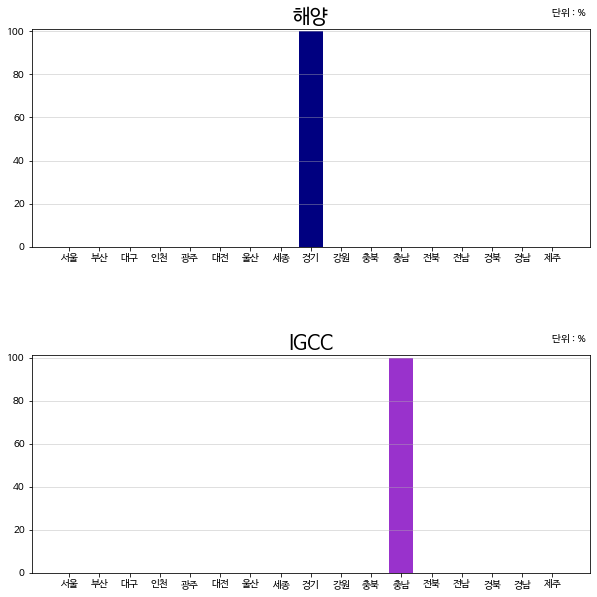

In [ ]:
# 데이터 시각화 : 해양과 IGCC
energy_kind = ['해양', 'IGCC']      
f, axes = plt.subplots(len(energy_kind), 1)

f.set_size_inches((10, 10))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

for idx, kind in enumerate(energy_kind):
    # x축은 광역시도
    kind_series = energy_temp.loc[kind][1:]

    # y축 범위 지정
    axes[idx].set_ylim(0, 101)

    # 막대그래프 그리기(퍼센트)
    axes[idx].bar(kind_series.index, 
                  kind_series / kind_series.sum() * 100, 
                  color=city_color(kind_series.index.to_list()))        
    axes[idx].set_title(kind, fontsize=20)
    axes[idx].grid(axis='y', alpha=0.5)
    axes[idx].text(16, 107, '단위 : %')

plt.show()

### 지도 상에 광역시도별 총 발전량 비교

##### 광역시도 발전량 비교 : folium 사용

In [ ]:
# 대한민국 지도 표시
latitude, longitude = 35.9078, 127.7669 # 대한민국 위도, 경도
s_korea = folium.Map(location = [latitude, longitude], zoom_start=7, tiles='cartodbpositron')

# 광역시도 경계 json 파일 불러오기
with open(drive_path +'TL_SCCO_CTPRVN.json' , mode='rt', encoding='utf-8') as f:
    geo = json.loads(f.read())

# 지도 위에 광역시도 경계 추가
folium.GeoJson(geo).add_to(s_korea)
s_korea

In [ ]:
# json에 입력되어있는 도시명 파악
# json 파일을 열면 geo['features'][i]['properties']['CTP_KOR_NM'] 이 위치에 광역시도가 포함됨.
# 따라서 저 위치 값만 모두 뽑아서 리스트에 넣기
list_region =[]
for i in range(len(geo['features'])):
    list_region.append(geo['features'][i]['properties']['CTP_KOR_NM'])
list_region

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [ ]:
# json 파일에 광역시도 이름 바꿔넣기
# 우리가 쓰는 df의 파일명으로 바꿔야, 나중에 이것을 기준으로 값을 넣기 편함
cities = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
region_re = []
for i in range(len(geo['features'])):
    geo['features'][i]['properties']['CTP_KOR_NM'] = cities[i]
    region_re.append(geo['features'][i]['properties']['CTP_KOR_NM'])
region_re

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

In [ ]:
# 도시별 총 발전량을 dict형으로 저장
# 데이터를 dict 형태로 만들기엔 시리즈가 편합니다....괜히 데이터 프레임 하지 마세요....
energy_sum = pd.Series(energy.sum().values, index=energy.T.index)
city_energy = energy_sum[1:].to_dict()
city_energy

{'강원': 4853276.0,
 '경기': 4144715.0,
 '경남': 2312060.0,
 '경북': 3692918.0,
 '광주': 312320.0,
 '대구': 225732.0,
 '대전': 100649.0,
 '부산': 465479.0,
 '서울': 646021.0,
 '세종': 155943.0,
 '울산': 945399.0,
 '인천': 1471330.0,
 '전남': 4935349.0,
 '전북': 6839650.0,
 '제주': 2479496.6,
 '충남': 7331177.0,
 '충북': 2149997.0}

In [ ]:
# 총 발전량을 지도 위에 표시
s_korea.choropleth(geo_data=geo,       
             data=city_energy, 
             fill_color='YlOrRd', 
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.CTP_KOR_NM',
             legend_name="도시별 총 친환경에너지 발전량"
            )
s_korea

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
# 지도 저장
# s_korea.save(drive_path + 'city.html')

##### 광역시도 발전량 비교 : folium 사용(1~100)

In [ ]:
# 대한민국 지도 표시
latitude, longitude = 35.9078, 127.7669 
s_korea_percent = folium.Map(location = [latitude, longitude], zoom_start=7, tiles='cartodbpositron')

# 광역시도 경계 json 파일 불러오기
with open(drive_path +'TL_SCCO_CTPRVN.json' , mode='rt', encoding='utf-8') as f:
    geo_percent = json.loads(f.read())

# 지도 위에 광역시도 경계 추가
folium.GeoJson(geo_percent).add_to(s_korea_percent)
s_korea_percent

In [ ]:
# min=1, max=100으로 스케일링
def min_max_scaling(data, min=1, max=100):
    scaling = (data - data.min()) / (data.max() - data.min()) * (max - min) + min
    return scaling

In [ ]:
# 총 발전량을 지도 위에 표시(1~100으로 스케일링)
energy_sum = pd.Series(min_max_scaling(energy.iloc[:, 1:].sum().values), index=energy.iloc[:, 1:].T.index)
city_energy = energy_sum.to_dict()
city_energy

{'강원': 66.07271294710428,
 '경기': 56.37113389229666,
 '경남': 31.278520323826974,
 '경북': 50.18515369831913,
 '광주': 3.8981879331633875,
 '대구': 2.712629700071696,
 '대전': 1.0,
 '부산': 5.995232713295627,
 '서울': 8.467204054807615,
 '세종': 1.7570824703258185,
 '울산': 12.566271508802677,
 '인천': 19.767290438540588,
 '전남': 67.19645204333625,
 '전북': 93.27003878554926,
 '제주': 33.57105323428662,
 '충남': 100.0,
 '충북': 29.059562455189994}

In [ ]:
# json 파일에 광역시도 이름 바꿔넣기
cities = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
region_re = []
for i in range(len(geo_percent['features'])):
    geo_percent['features'][i]['properties']['CTP_KOR_NM'] = cities[i]
    region_re.append(geo_percent['features'][i]['properties']['CTP_KOR_NM'])

# 총 발전량(비율)을 지도 위에 표시
s_korea_percent.choropleth(geo_data=geo_percent,
             data=city_energy, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.CTP_KOR_NM',
             legend_name="도시별 총 친환경에너지 발전량"
            )
s_korea_percent


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


##### 광역시도 발전량 비교 : geopandas 사용



In [ ]:
# geopandas 설치
# 판다스 문법과 plt 문법을 모두 쓸 수 있는 느낌.
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

In [ ]:
# 광역시도별로 분리된 한국 지도(좌표값) 불러오기
# https://gadm.org/download_country.html
shapefile = drive_path + "gadm40_KOR_shp/gadm40_KOR_1.shp"
gdf = gpd.read_file(shapefile)[['NAME_1', 'geometry']]
gdf.columns = ['name', 'geometry']
gdf

,name,geometry
0,Busan,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ..."
1,Chungcheongbuk-do,"POLYGON ((127.86983 36.32472, 127.86292 36.317..."
2,Chungcheongnam-do,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ..."
3,Daegu,"POLYGON ((128.68890 35.72989, 128.68930 35.719..."
4,Daejeon,"POLYGON ((127.52377 36.37342, 127.52950 36.361..."
5,Gangwon-do,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ..."
6,Gwangju,"POLYGON ((127.01091 35.09471, 127.00610 35.087..."
7,Gyeonggi-do,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ..."
8,Gyeongsangbuk-do,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ..."
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ..."


In [ ]:
# 도시 이름 변경
name_new = ['부산', '충북', '충남', '대구', '대전', '강원', '광주', '경기', '경북', '경남', '인천', '제주', '전북', '전남', '세종', '서울', '울산']
gdf['name'] = name_new
gdf

,name,geometry
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ..."
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317..."
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ..."
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719..."
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361..."
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ..."
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087..."
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ..."
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ..."
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ..."


In [ ]:
# 도시별 총 발전량을 df로 만들기
# 앞에 자료가 도시가 세로로 써져있으므로 이를 위해 기존 데이터를 돌림(.T)
# 총 발전량 중, 전체 데이터는 필요없으므로 뺌([1:])
# 열로 있어야 연산이 편하므로, reset_index()로 인덱스에서 열로 만듦
city_df = pd.DataFrame(energy.sum().values, index=energy.T.index)[1:].reset_index()
city_df

,index,0
0,서울,646021.0
1,부산,465479.0
2,대구,225732.0
3,인천,1471330.0
4,광주,312320.0
5,대전,100649.0
6,울산,945399.0
7,세종,155943.0
8,경기,4144715.0
9,강원,4853276.0


In [ ]:
# df 병합
# left_on : 왼쪽기준
# right_on : 오른쪽 기준.
# 위 둘이 같으면 합칠 수 있음.
# how='outer' : 밖으로 합쳐라.
# 판다스의 merge 함수 쓰는것처럼 쓰면 됨.
gdf_heat = gdf.merge(city_df, left_on='name', right_on='index', how='outer').fillna(0)
gdf_heat

,name,geometry,index,0
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ...",부산,465479.0
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317...",충북,2149997.0
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ...",충남,7331177.0
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719...",대구,225732.0
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361...",대전,100649.0
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ...",강원,4853276.0
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087...",광주,312320.0
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ...",경기,4144715.0
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ...",경북,3692918.0
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ...",경남,2312060.0


In [ ]:
# column 중복 삭제 및 정리
gdf_heat.drop(["index"], axis=1, inplace=True)
gdf_heat = gdf_heat.rename(columns={0:"도시별 총 친환경에너지 발전량"})
gdf_heat

,name,geometry,도시별 총 친환경에너지 발전량
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ...",465479.0
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317...",2149997.0
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ...",7331177.0
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719...",225732.0
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361...",100649.0
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ...",4853276.0
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087...",312320.0
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ...",4144715.0
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ...",3692918.0
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ...",2312060.0


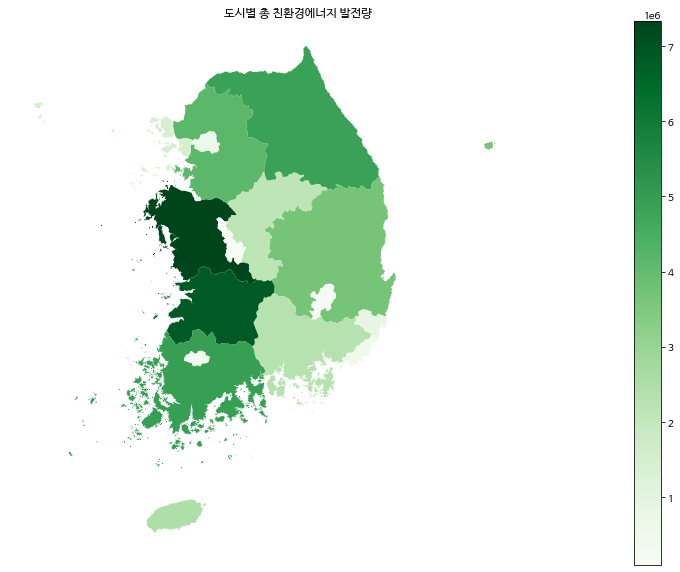

In [ ]:
# 지도 그리기
f, ax = plt.subplots(1, 1, figsize=(16,10))     # 지도 크기 구하기
gdf_heat.plot(column=gdf_heat['도시별 총 친환경에너지 발전량'], 
              legend=True, 
              ax=ax, 
              cmap='Greens')

ax.set_title("도시별 총 친환경에너지 발전량")
ax.set_axis_off()

plt.show()

##### 광역시도 발전량 비교 : geopandas 사용(1~100)

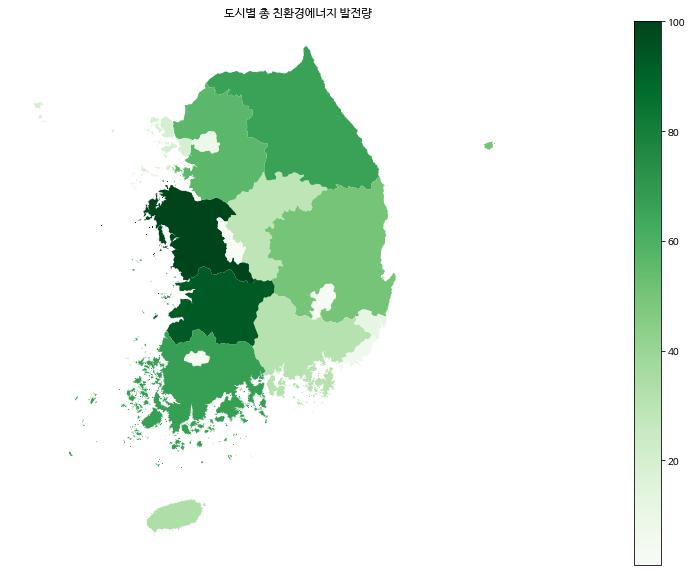

In [ ]:
# 지도 그리기(스케일링)
f, ax = plt.subplots(1, 1, figsize=(16,10))
gdf_heat.plot(column=min_max_scaling(gdf_heat['도시별 총 친환경에너지 발전량']), 
              legend=True, 
              ax=ax, 
              cmap='Greens')

ax.set_title("도시별 총 친환경에너지 발전량")
ax.set_axis_off()

plt.show()